<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import ssl
%matplotlib inline
import statistics
import math

Загрузить датасет по url:


In [91]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [93]:
df.head(7)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

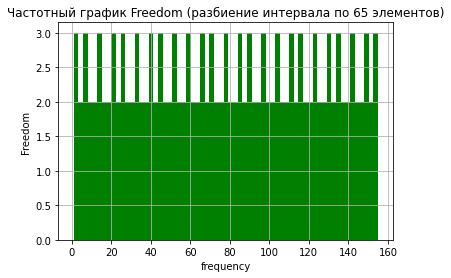

In [21]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 65, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 65 элементов)')
plt.grid(True)
plt.show()

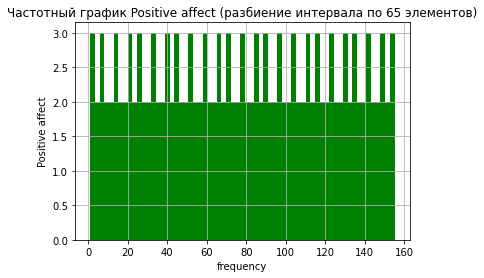

In [20]:
n, bins, patches = plt.hist(df['Positive affect'], 65, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 65 элементов)')
plt.grid(True)
plt.show()

На графиках представлено равномерное распределение.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [60]:
#data=df['Freedom']
#print('Медиана: ', statistics.median(df['Freedom'])
print('Медиана: ', (df['Freedom']).median())
print('Мода: ', statistics.mode(df['Freedom']))
print('Математическое ожидание: ', (df['Freedom']).mean())
#print('Стандартное отклонение: ', statistics.pstdev(df['Freedom']))
print('Стандартное отклонение: ', np.std(df['Freedom']))
print('Дисперсия: ', (np.std(df['Freedom'])**2))
print('Минимум: ', (df['Freedom']).min())
print('Максимум: ', (df['Freedom']).max())
print('Выбросы: ',df['Freedom'].isnull().sum())
print('Размах: ', (df['Freedom']).max() - (df['Freedom']).min())

Медиана:  78.0
Мода:  5.0
Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Выбросы:  1
Размах:  154.0


Почему нельзя найти моду?

Технически найти моду можно, но значение будет неверным. Вероятно, это объясняется тем, что значения в столбце Freedom могут не повторяться.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

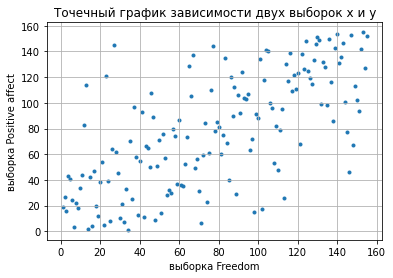

In [63]:
f = df['Freedom']
pa = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(f, pa, marker='.')

In [71]:
from scipy.stats import pearsonr
x = df['Freedom']
y = df['Positive affect']
corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.696567045809068


Знак коэффициента говорит о направленности корреляции. В данном случае она положительна и стремится к 1, следовательно, увеличение одного показателя влечет увелечение другого. Чем выше степень свободы, тем выше положительный эффект.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [78]:
f = df['Freedom']
print(statistics.mean(f))

f_1 = f - statistics.mean(f)
print(statistics.mean(f_1))

print(min(f_1))
print(max(f_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

f_2 = min_max_scaler.fit_transform(np.array(f_1).reshape(-1, 1))
print(min(f_2))
print(max(f_2))

78.82857142857142
6.496390726949487e-15
-77.82857142857142
76.17142857142858
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

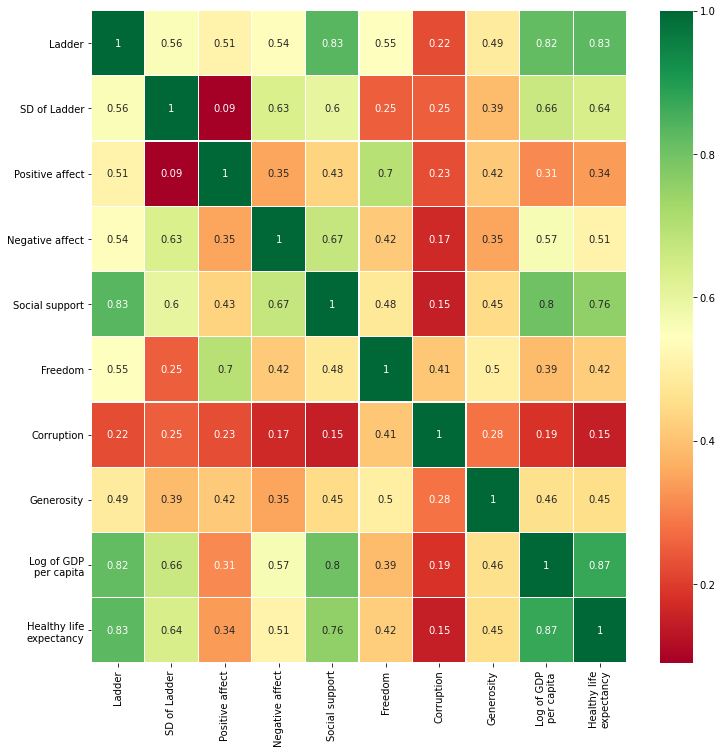

In [79]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [97]:
df_a=pd.read_csv('avocado.csv')
df_a[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

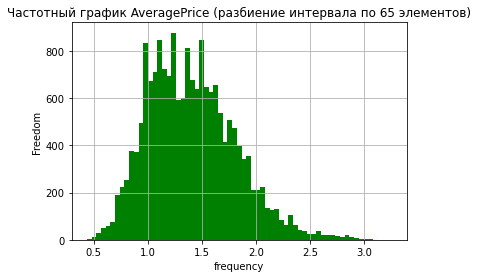

In [98]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df_a['AveragePrice'], 65, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график AveragePrice (разбиение интервала по 65 элементов)')
plt.grid(True)
plt.show()

In [ ]:
На графике представлено нормальное распределение.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878843


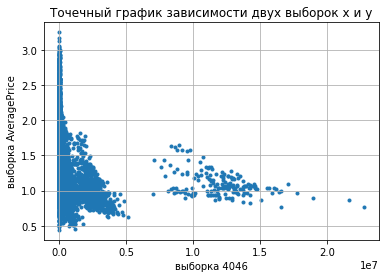

In [99]:
x = df_a['4046']
y = df_a['AveragePrice']
plt.xlabel('выборка 4046')
plt.ylabel('выборка AveragePrice')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17292777250933525


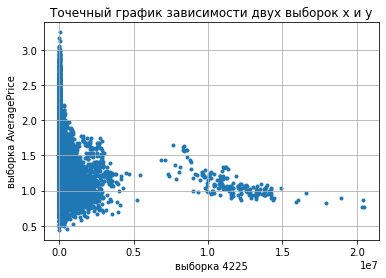

In [100]:
x = df_a['4225']
y = df_a['AveragePrice']
plt.xlabel('выборка 4225')
plt.ylabel('выборка AveragePrice')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17944598397975617


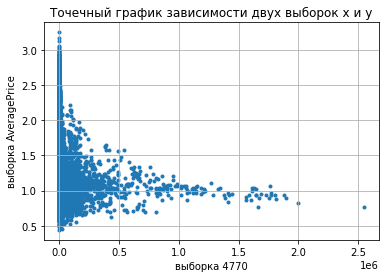

In [101]:
x = df_a['4770']
y = df_a['AveragePrice']
plt.xlabel('выборка 4770')
plt.ylabel('выборка AveragePrice')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Все три рассчитанные корреляции оказались обратными, при этом их значения ближе к нулю. При отрицательной корреляции увеличение одного параметра приведет у меньшению другого. Также можно судить о том, что корреляция слабая.